In [60]:
import keras
from keras import layers
import os
import numpy as np
from PIL import Image 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

image_folder = './Pikachu images\\FilteredImages'
image_size = (128, 128)

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Load and ensure RGB format
    img = img.resize(image_size)
    img_array = np.asarray(img)
    return img_array / 255.0  # Normalize


X = []  # List to hold image data
y = []  # List to hold labels

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)

    if filename.startswith('pikachu'):
        label = 1  # Assign label 1 for Pikachu
    elif filename.startswith('not_pikachu'):
        label = 0  # Assign label 0 for not Pikachu
    else:
        continue  # Skip any files not matching the pattern

    img_array = load_and_preprocess_image(img_path)
    X.append(img_array)
    y.append(label)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)


In [61]:
model = Sequential([
    Conv2D(128, (3, 3), activation='selu', input_shape=(128, 128, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='selu'),
    MaxPooling2D(4),
    Conv2D(64, (3, 3), activation='selu'),
    MaxPooling2D(4),
    Flatten(),
    Dense(120, activation='selu'),
    Dense(64, activation='selu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
32/32 [==============================] - 17s 512ms/step - loss: 0.6103 - accuracy: 0.7305 - val_loss: 0.2766 - val_accuracy: 0.9120
Epoch 2/20
32/32 [==============================] - 17s 543ms/step - loss: 0.3575 - accuracy: 0.8457 - val_loss: 0.2445 - val_accuracy: 0.9080
Epoch 3/20
32/32 [==============================] - 17s 532ms/step - loss: 0.3353 - accuracy: 0.8417 - val_loss: 0.4106 - val_accuracy: 0.8240
Epoch 4/20
32/32 [==============================] - 20s 636ms/step - loss: 0.2505 - accuracy: 0.8868 - val_loss: 0.5788 - val_accuracy: 0.8040
Epoch 5/20
32/32 [==============================] - 19s 597ms/step - loss: 0.2019 - accuracy: 0.9178 - val_loss: 0.3722 - val_accuracy: 0.8560
Epoch 6/20
32/32 [==============================] - 18s 562ms/step - loss: 0.1811 - accuracy: 0.9238 - val_loss: 0.2893 - val_accuracy: 0.8920
Epoch 7/20
32/32 [==============================] - 22s 680ms/step - loss: 0.2162 - accuracy: 0.9078 - val_loss: 0.3395 - val_accuracy: 0.8640

In [62]:
import matplotlib.pyplot as plt

predictions = model.predict(X)

for i in range(len(predictions)):
    predicted_class = np.round(predictions[i]).astype(int)[0] 
    true_class = y[i]

    if predicted_class == 1 and true_class == 0:
        image_array = X[i] 
        plt.imshow(image_array)
        plt.title('Misclassified as Pikachu')
        plt.show()

39/39 [==============================] - 11s 284ms/step


1/1 [==============================] - 0s 38ms/step
1
Probability of Pikachu: 1.00
The image is predicted to be Pikachu!


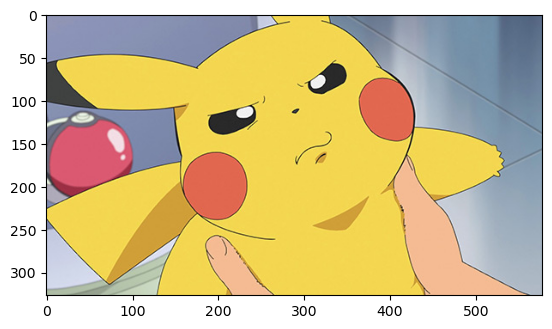

1/1 [==============================] - 0s 41ms/step
0
Probability of Pikachu: 0.38
The image is predicted to be NOT Pikachu.


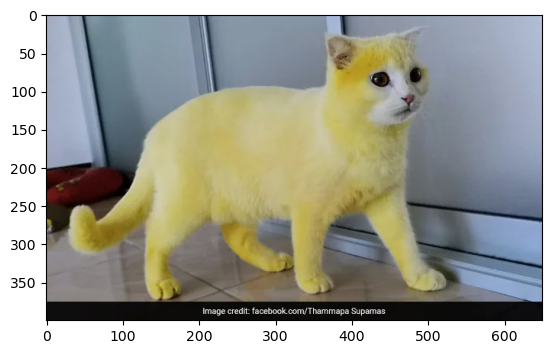

1/1 [==============================] - 0s 44ms/step
0
Probability of Pikachu: 0.01
The image is predicted to be NOT Pikachu.


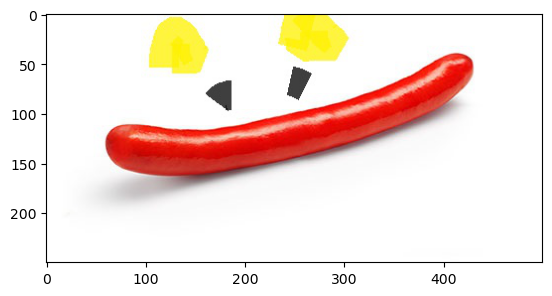

1/1 [==============================] - 0s 47ms/step
0
Probability of Pikachu: 0.00
The image is predicted to be NOT Pikachu.


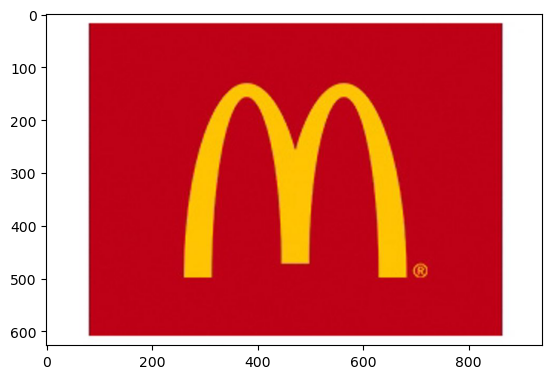

1/1 [==============================] - 0s 35ms/step
1
Probability of Pikachu: 1.00
The image is predicted to be Pikachu!


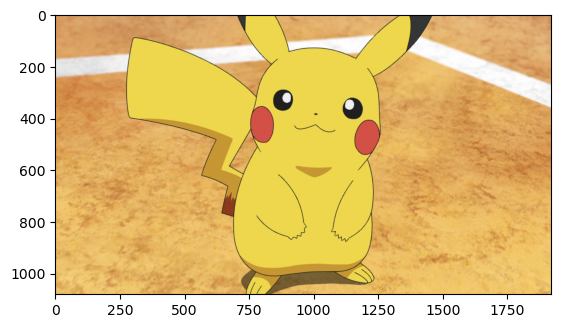

1/1 [==============================] - 0s 36ms/step
1
Probability of Pikachu: 1.00
The image is predicted to be Pikachu!


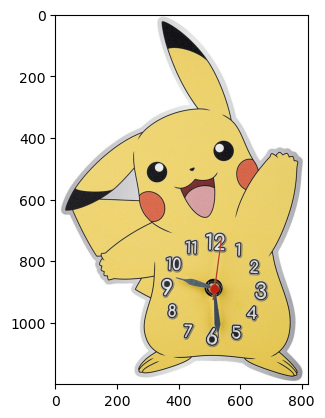

1/1 [==============================] - 0s 34ms/step
1
Probability of Pikachu: 0.56
The image is predicted to be Pikachu!


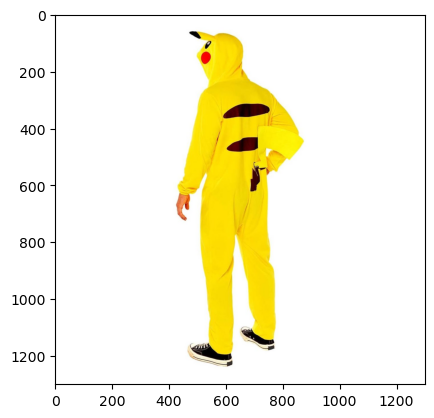

1/1 [==============================] - 0s 39ms/step
0
Probability of Pikachu: 0.00
The image is predicted to be NOT Pikachu.


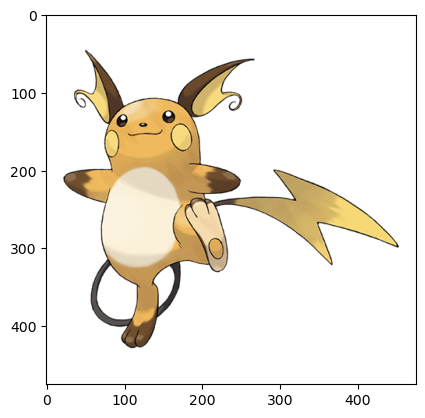

1/1 [==============================] - 0s 34ms/step
1
Probability of Pikachu: 1.00
The image is predicted to be Pikachu!


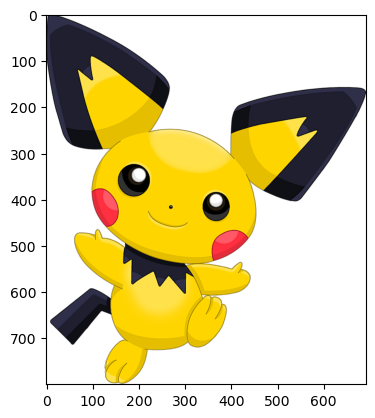

1/1 [==============================] - 0s 41ms/step
0
Probability of Pikachu: 0.00
The image is predicted to be NOT Pikachu.


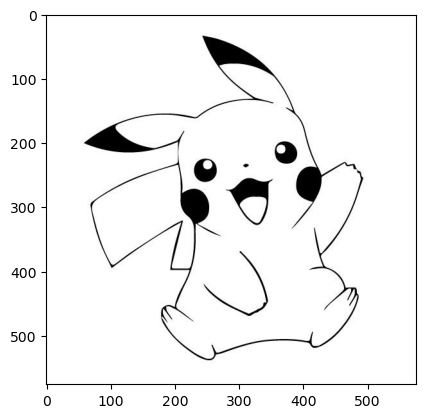

1/1 [==============================] - 0s 43ms/step
0
Probability of Pikachu: 0.00
The image is predicted to be NOT Pikachu.


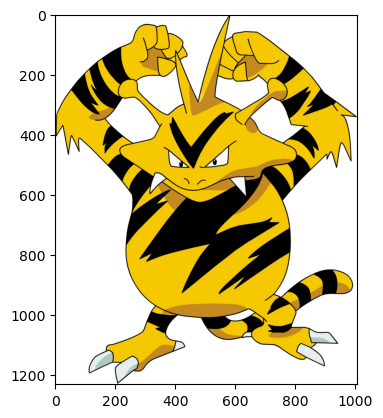

1/1 [==============================] - 0s 35ms/step
0
Probability of Pikachu: 0.00
The image is predicted to be NOT Pikachu.


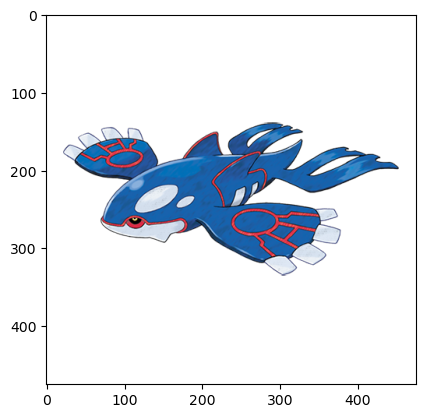

1/1 [==============================] - 0s 32ms/step
0
Probability of Pikachu: 0.30
The image is predicted to be NOT Pikachu.


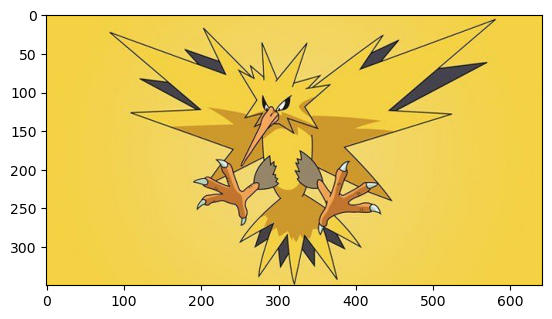

1/1 [==============================] - 0s 34ms/step
1
Probability of Pikachu: 1.00
The image is predicted to be Pikachu!


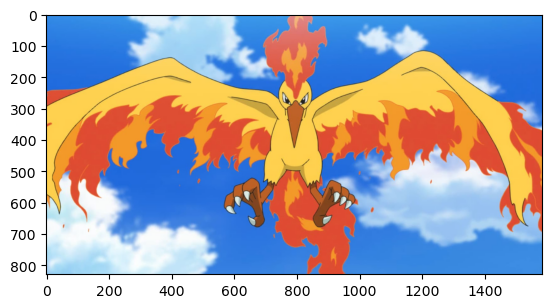

In [70]:
def imagesTest(image_path):
    image_data = load_and_preprocess_image(image_path)
    image_data = np.expand_dims(image_data, axis=0)
    # Ovenstående er tilføjet for at få det til at passe med dimensionerne af input til modellen

    prediction = model.predict(image_data)
    pikachu_probability = prediction[0][0]
    predicted_class = np.round(prediction).astype(int)[0][0]
    print(predicted_class)
    print(f"Probability of Pikachu: {pikachu_probability:.2f}")

    if predicted_class == 1:
        print("The image is predicted to be Pikachu!")
    else:
        print("The image is predicted to be NOT Pikachu.")

    # Display the image
    img = Image.open(image_path)  # Load the original image
    plt.imshow(img)
    plt.show()

image_path = './test.jpg'
image_path2 = './test2.jpg'
image_path3 = './test3.jpg'
image_path4 = './test4.jpg'
image_path5 = './test5.jpg'
image_path6 = './test6.jpg'
image_path7 = './test7.jpg'
image_path8 = './test8.jpg'
image_path9 = './test9.jpg'
image_path10 = './test10.jpg'
image_path11 = './test11.jpg'
image_path12 = './test12.jpg'  
image_path13 = './test13.jpg'

imagesTest(image_path10)
imagesTest(image_path)
imagesTest(image_path2)
imagesTest(image_path3)
imagesTest(image_path4)
imagesTest(image_path5)
imagesTest(image_path6)
imagesTest(image_path7)
imagesTest(image_path8)
imagesTest(image_path9)
imagesTest(image_path11)
imagesTest(image_path12)
imagesTest(image_path13)

